In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
# A: you’re given a list of edges as unordered pairs
edges = [(0,1), (0,2), (1,2), (2,3), (3,4)]

In [6]:
# 1. Build the adjacency matrix A (size 5×5) from these edges
n = 5
A = np.zeros((n, n), dtype=int)
for i, j in edges:
    A[i, j] = _____      # blank#1: ?
    A[j, i] = _____      # blank#2: ?

In [7]:
# 2. Turn it into a DataFrame with labels 0–4
dfA = pd.DataFrame(A, index=range(n), columns=range(n))
dfA

,0,1,2,3,4
0,0,1,1,0,0
1,1,0,1,0,0
2,1,1,0,1,0
3,0,0,1,0,1
4,0,0,0,1,0


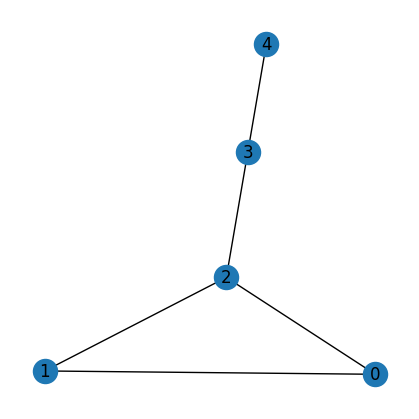

In [8]:
# 3. Convert to a NetworkX graph and draw
G = nx.from_numpy_array(A)
plt.figure(figsize=(4,4))
nx.draw(G, with_labels=True)
plt.show()

In [13]:
# Now a list of directed edges
d_edges = [(0,1), (2,0), (1,2), (3,2)]

In [17]:
# 1. Build the adjacency matrix D (5×5)
D = np.zeros((n, n), dtype=int)
for i, j in d_edges:
    D[i, j] = _____         # blank#3: ?

pd.DataFrame(D)


,0,1,2,3,4
0,0,1,0,0,0
1,0,0,1,0,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,0,0,0,0


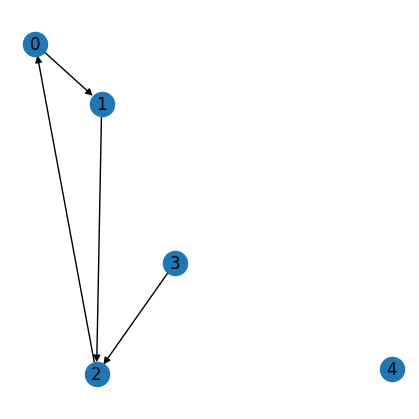

In [16]:
# 2. Build and draw a DiGraph
DG = nx.from_numpy_array(D, create_using=nx.DiGraph)
plt.figure(figsize=(4,4))
nx.draw(DG, with_labels=True, arrows=True)
plt.show()

In [18]:
# Now each edge carries a “strength”
w_edges = [ (0,1,5), (1,2,2), (2,3,7), (3,4,3) ]

In [22]:
# 1. Fill adjacency matrix W with these weights
W = np.zeros((n,n), dtype=float)
for i,j,w in w_edges:
    W[i,j] = _____         # blank#4: ?
    W[j,i] = _____         # blank#5: ?

pd.DataFrame(W)

,0,1,2,3,4
0,0.0,5.0,0.0,0.0,0.0
1,5.0,0.0,2.0,0.0,0.0
2,0.0,2.0,0.0,7.0,0.0
3,0.0,0.0,7.0,0.0,3.0
4,0.0,0.0,0.0,3.0,0.0


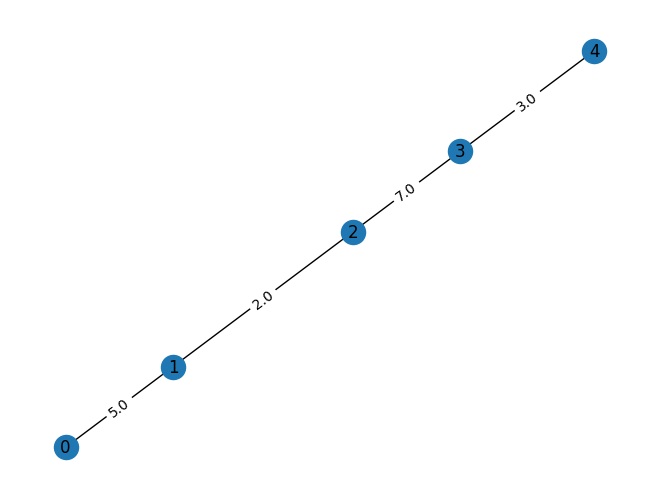

In [23]:
# 2. Build weighted graph & visualize edges by weight
WG = nx.from_numpy_array(W)
pos = nx.spring_layout(WG)
nx.draw(WG, pos, with_labels=True)
labels = nx.get_edge_attributes(WG,'weight')
nx.draw_networkx_edge_labels(WG, pos, edge_labels=labels)
plt.show()

In [24]:
# +1 = “friend”, -1 = “enemy”
s_edges = [ (0,1,1), (1,2,-1), (2,3,1), (3,0,-1) ]

In [26]:
# 1. Build signed adjacency matrix S
S = np.zeros((n,n), dtype=int)
for i,j,s in s_edges:
    S[i,j] = _____         # blank#6: ?
    S[j,i] = _____         # blank#7: ?

pd.DataFrame(S)


,0,1,2,3,4
0,0,1,0,-1,0
1,1,0,-1,0,0
2,0,-1,0,1,0
3,-1,0,1,0,0
4,0,0,0,0,0


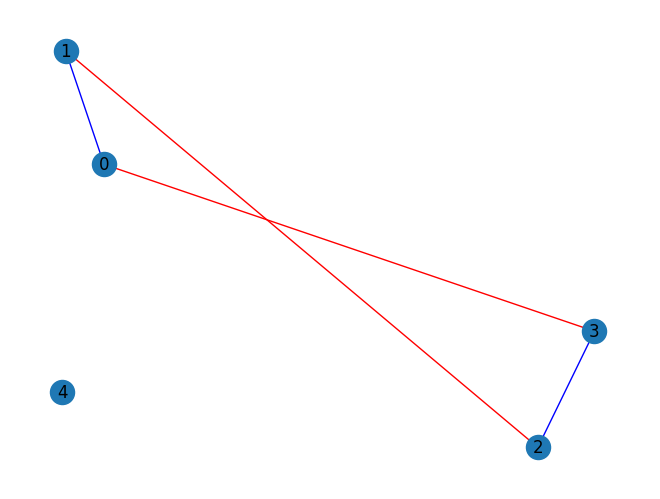

In [27]:
# 2. Visualize with color coding
SG = nx.from_numpy_array(S)
edge_colors = ['red' if SG[u][v]['weight']<0 else 'blue'
               for u,v in SG.edges()]
nx.draw(SG, with_labels=True, edge_color=edge_colors)
plt.show()

In [28]:
# Actors 0–3, events A–C
actor_event = [(0,'A'), (1,'A'), (2,'B'), (3,'B'), (0,'C'), (3,'C')]

In [30]:
# 1. Build the incidence matrix M (4×3)
actors = 4; events = ['A','B','C']
M = pd.DataFrame(0, index=range(actors), columns=events)
for i, e in actor_event:
    M.loc[i, e] = _____      # blank#8: ?

M

,A,B,C
0,1,0,1
1,1,0,0
2,0,1,0
3,0,1,1


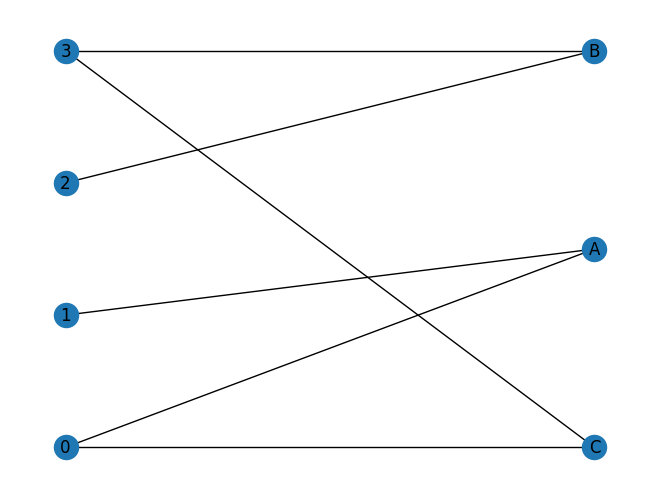

In [34]:
# 2. Convert to a bipartite graph
from networkx.drawing.layout import bipartite_layout
B = nx.Graph()
B.add_nodes_from(M.index, bipartite=0)
B.add_nodes_from(M.columns, bipartite=1)
B.add_edges_from(actor_event)
pos = bipartite_layout(B, nodes=list(M.index))
plt.figure()
nx.draw(B, pos, with_labels=True)
plt.show()